# Importa las dependencias necesarias

In [35]:
# Importamos las bibliotecas que usaremos
import numpy as np  # numpy es una biblioteca para trabajar con matrices y números
import matplotlib.pyplot as plt  # matplotlib es una biblioteca para trazar gráficos
import matplotlib.animation as animation # matplotlib animation es una libreria que permite crear una animación a partir de la grafica generada.
from sklearn.datasets import make_gaussian_quantiles  # sklearn es una biblioteca para machine learning y datasets
from time import time # time libreria utilizada para medir el tiempo de ejecución.

# Barra de progreso

Esta función crea una barra de progreso simple para mostrar el progreso de una tarea. El primer argumento, segment, es el número actual de la tarea completada, el segundo argumento, total, es el número total de tareas y el tercer argumento, long, es la longitud total de la barra de progreso que se desea mostrar.

In [3]:
# Definimos una función llamada progressBar que toma tres argumentos: segment, total y long
def progressBar(segment, total, long):
    # Calculamos el porcentaje de finalización de la tarea
    por = segment / total
    # Calculamos el número de caracteres '#' que necesitamos para el progreso completo
    complet = int(por * long)
    # Calculamos el número de caracteres '-' que necesitamos para el progreso incompleto
    res = long - complet
    # Creamos la barra de progreso utilizando el formato de cadena f-string
    bar = f"[ {'#' * complet}{'-' * res} {por:.2%} ]"
    # Retornamos la barra de progreso
    return bar

# Obtener el data set de entrenamiento

Este código utiliza la función make_gaussian_quantiles para generar un conjunto de datos con distribución gaussiana, luego extrae los valores x e y de ese conjunto de datos y los grafica en un gráfico de dispersión utilizando la biblioteca matplotlib.

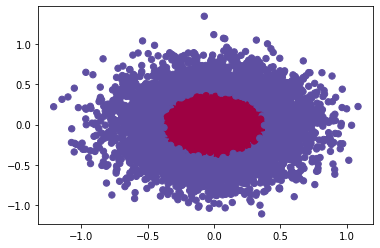

In [4]:
# Establecemos el número de valores gaussianos a generar
number_data = 10000 

# Generamos un conjunto de datos con distribución gaussiana utilizando make_gaussian_quantiles 
# Las muestras se generan a partir de dos distribuciones gaussianas diferentes
# Con n_samples especificamos el número de muestras, n_features especifica el número de características, 
# n_classes especifica el número de clases y cov especifica la matriz de covarianza
# shuffle especifica si las muestras se deben mezclar aleatoriamente y random_state especifica una semilla aleatoria
gaussian_quantiles = make_gaussian_quantiles(mean=None, cov=0.1, n_samples=number_data, n_features=2, n_classes=2, shuffle=True, random_state=None)

# Extraemos los valores x y y del conjunto de datos generado
X, Y = gaussian_quantiles

# Expandimos el vector Y para poder graficarlo
Y = Y[:,np.newaxis]

# Graficamos los valores en un gráfico de dispersión, utilizando cmap para definir el mapa de colores
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

# Funcion para inicializar los valores de manera random

Este código define una función que inicializa los parámetros de una red neuronal con valores aleatorios. Toma una lista de dimensiones de la red neuronal como entrada y devuelve un diccionario que contiene los pesos y sesgos iniciales para cada capa de la red.

La función itera sobre las dimensiones de la red neuronal y para cada capa, inicializa una matriz de pesos con valores aleatorios en el rango [-1, 1] y un vector de sesgos con valores aleatorios en el mismo rango. Estos pesos y sesgos se almacenan en un diccionario y se devuelve al final de la función.

In [5]:
def inicializa_los_parametros(dimensiones_red):
    """
    Inicializa los parámetros de una red neuronal con valores aleatorios.

    Argumentos:
    dimensiones_red -- lista de enteros que representa las dimensiones de la red neuronal

    Devuelve:
    parametros -- diccionario que contiene los parámetros iniciales para cada capa de la red neuronal
                  pesos y sesgos aleatorios
    """

    # Crea un diccionario vacío que contendrá los parámetros
    parametros = {}

    # Obtiene la longitud de la lista de dimensiones, que representa el número de capas en la red neuronal
    longitud = len(dimensiones_red)

    # Itera sobre todas las capas de la red neuronal, excepto la última (la capa de salida)
    for i in range(0, longitud - 1):
        # Crea una clave para la matriz de pesos de la capa actual
        nombre_de_peso = 'W' + str(i + 1)

        # Obtiene la dimensión de la fila de la matriz de pesos (el número de neuronas en la capa anterior)
        fila_de_matris = dimensiones_red[i]

        # Obtiene la dimensión de la columna de la matriz de pesos (el número de neuronas en la capa actual)
        columna_de_matris = dimensiones_red[i + 1]

        # Inicializa la matriz de pesos con valores aleatorios en el rango [-1, 1]
        parametros[nombre_de_peso] = (np.random.rand(fila_de_matris, columna_de_matris) * 2) - 1

        # Crea una clave para el vector de sesgos de la capa actual
        nombre_de_sesgo = "b" + str(i + 1)

        # Inicializa el vector de sesgos con valores aleatorios en el rango [-1, 1]
        parametros[nombre_de_sesgo] = (np.random.rand(1, columna_de_matris) * 2) - 1

    # Devuelve el diccionario con los parámetros iniciales
    return parametros


# Funciones de activacion

Los comentarios explican que cada función es una función de activación, que toma un valor x y calcula su función de activación correspondiente. La función sigmoide es una función matemática que toma cualquier valor real y devuelve un valor en el rango de 0 a 1, y la función ReLU (Rectified Linear Unit) devuelve el valor de entrada si es positivo y 0 si es negativo. Además, se explica que si el parámetro derivada es True, las funciones devuelven la derivada de la función de activación en lugar de la función de activación en sí.

In [6]:
def sigmoide(x, derivada = False):
    """
    Función sigmoide: calcula la función sigmoide de un valor x. Si la derivada es verdadera,
    devuelve la derivada de la función sigmoide.

    Parámetros:
    x (float): valor para calcular la función sigmoide
    derivada (bool): si es verdadero, devuelve la derivada de la función sigmoide en lugar de la función sigmoide

    Retorna:
    (float): el resultado de la función sigmoide si derivada es falso, la derivada de la función sigmoide si
    derivada es verdadero
    """
    if derivada:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivada = False):
    """
    Función de activación ReLU: calcula la función ReLU de un valor x. Si la derivada es verdadera,
    devuelve la derivada de la función ReLU.

    Parámetros:
    x (float): valor para calcular la función ReLU
    derivada (bool): si es verdadero, devuelve la derivada de la función ReLU en lugar de la función ReLU

    Retorna:
    (float): el resultado de la función ReLU si derivada es falso, la derivada de la función ReLU si
    derivada es verdadero
    """
    if derivada:
        # si la entrada x es menor o igual que 0, la derivada es cero
        # de lo contrario, la derivada es 1
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)


# Funciones de activación

Grafica las funciones de activación para verificar que funciónan correctamente. 

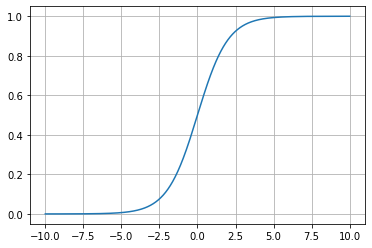

In [7]:
# Crear un arreglo numpy con valores equiespaciados entre 10 y -10
x_example = np.linspace(10, -10, 20000)
# Graficar la función sigmoide de x_example
plt.plot(x_example, sigmoide(x_example))
# Agregar una cuadrícula a la gráfica
plt.grid()

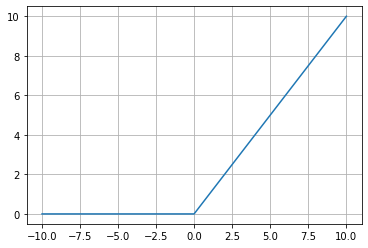

In [8]:
# Crear un arreglo numpy con valores equiespaciados entre 10 y -10
x_example = np.linspace(10, -10, 20000)
# Graficar la función ReLU de x_example
plt.plot(x_example, relu(x_example))
# Agregar una cuadrícula a la gráfica
plt.grid()

# Funcion de perdida
La función mse calcula el error cuadrático medio (MSE, por sus siglas en inglés) entre las predicciones y_hat y los valores verdaderos y de un conjunto de datos. El MSE se utiliza a menudo como una métrica de evaluación en problemas de regresión.

In [9]:
def mse(y,y_hat,derivada=False):
    """
    Función que calcula el error cuadrático medio (MSE) entre dos arrays.

    Args:
        y (array): Array de valores reales.
        y_hat (array): Array de valores estimados.
        derivada (bool, optional): Si es True, retorna la derivada de la función. 
                                   Por defecto, es False.

    Returns:
        array: Valor del error cuadrático medio entre los arrays y y y_hat.
               Si derivada es True, retorna la derivada del MSE.

    """
    if derivada:
        # Retorna la derivada del error cuadrático medio.
        # Esta es utilizada en el entrenamiento de la red neuronal para actualizar los pesos y minimizar el error.
        return (y_hat - y)
    else:   
        # Retorna el valor del error cuadrático medio.
        # Esta es la métrica que se utiliza para evaluar el rendimiento de la red neuronal.
        return np.mean((y_hat - y)**2)


# Funcion de entrenamiento

Se inicia definiendo la estructura de la red neuronal a través de la definición de los tamaños de la capa de entrada, capas ocultas y capa de salida. Luego, se recorre cada capa y se realiza el procesamiento de los datos en la red, aplicando la función de activación y multiplicando por la matriz de pesos correspondiente. Después, se realiza el entrenamiento de la red neuronal utilizando el algoritmo de retropropagación para ajustar los pesos de la red y minimizar el error. Finalmente, se realiza el descenso del gradiente para actualizar los pesos y sesgos de la red neuronal.

In [10]:
def Training (x_data_input = [], y_data_input = [], lr = 0, params = {}, redNeurons = [1,1], isTraining = True) :

  output = 0; # Variable que contendra los datos de salida
  lengList = len(redNeurons) # Obtener la longitud del array de la estructura de la red

  # -------------------------------- Primer procesado

  # En primer lugar, se recorre cada índice de la red neuronal utilizando 
  # un bucle for, y para cada índice se definen los nombres de los parámetros 
  # correspondientes, como el nombre del conjunto de datos, la matriz de pesos, 
  # el sesgo y los valores de activación.

  # Luego, se verifica si el índice actual corresponde a la capa de entrada. 
  # Si es el caso, la entrada de datos será la entrada del modelo. Si no, 
  # se aplica la función de activación a los datos previos de la red, se 
  # multiplica por la matriz de pesos correspondiente y se suma el sesgo.

  # Si el índice actual corresponde a la última capa de la red, se aplica 
  # la función sigmoide a los datos para obtener los resultados de salida. 
  # De lo contrario, se aplica la función de activación ReLU a los datos.

  # Recorre cada index de la red neuronal
  for i in range(0, lengList) :

    name_data = "A" + str(i) 
    name_data_previus = "A" + str( i - 1) 
    name_values = "Z" + str(i) 
    name_weight = "W" + str(i)
    name_bias = "b" + str(i) 

    if i == 0 :
      # Si es el primer layer, entonces la entrada sera la entrada del modelo
      params[name_data] = x_data_input
    else :
      # Aplicamos la funcion de activacion a los datos previos de la red, aplicando la matriz de pesos y sumando el bias
      params[name_values] = np.matmul(params[name_data_previus], params[name_weight]) + params[name_bias]
      if i == lengList - 1 :
        # Si es el ultimo layer, se aplica la funcion sigmoide a los datos para obtener los resultados de salida
        params[name_data] = sigmoide(params[name_values])
        output = params[name_data]
      else :
        # Si no es el ultimo layer, se aplica la funcion de activacion ReLU a los datos
        params[name_data] = relu(params[name_values])
    

  # -------------------------------- Fin primer procesado  
    
  # -------------------------------- Entrenamiento

  # Esta sección realiza el entrenamiento de la red neuronal. 
  # Se recorre la estructura de la red neuronal, empezando desde la 
  # capa de salida y avanzando hacia las capas de entrada. 
  # Para cada capa, se calcula el error utilizando la matriz de pesos de 
  # la capa siguiente y el error de la capa siguiente. 
  # Se utilizan funciones de activación como sigmoide y relu para el cálculo 
  # del error. Luego, se calcula la matriz de pesos de error de la capa actual. 
  # Esto se realiza para cada capa de la red neuronal. Al final del entrenamiento, 
  # se devuelve el output y los parámetros de la red neuronal.

  if isTraining :
    # Recorre la estructura de la ren neuronal
    for i in range(1, lengList) :
      positionReverse = lengList-i
      if positionReverse == 0 : break
      # Define los nombres de los parametros
      name_values_back = "dZ" + str(positionReverse)
      name_values_back_previus = "dZ" + str(positionReverse + 1)
      name_weight_back = "dW" + str(positionReverse)

      name_data_back = "A" + str(positionReverse)
      name_data_back_previus = "A" + str(positionReverse - 1)
      name_weight = "W" + str(positionReverse + 1)

      if positionReverse == lengList - 1 :
        # Calcular el error en el output final utilizando la funcion de costo MSE
        params[name_values_back] = mse(y_data_input, output, True) * sigmoide(params[name_data_back], True)
        # Calcular la matriz de pesos de error en el output final
        params[name_weight_back] = np.matmul(params[name_data_back_previus].T, params[name_values_back])
      else :
        # Calcular el error en la capa actual utilizando la matriz de pesos y el error de la siguiente capa
        params[name_values_back] = np.matmul(params[name_values_back_previus], params[name_weight].T) * relu(params[name_data_back], True)
        # Calcular la matriz de pesos de error en la capa actual
        params[name_weight_back] = np.matmul(params[name_data_back_previus].T, params[name_values_back])
    
    
    # -------------------------------- Fin entrenamiento

    # -------------------------------- Descenso del gradiente

    # En esta sección de código, se realiza la actualización de los pesos
    # y sesgos de la red neuronal utilizando el algoritmo de descenso de 
    # gradiente. Se recorre la lista de las neuronas de la red de manera 
    # inversa para poder actualizar las capas en el orden correcto.

    for i in range(1, lengList) :
      positionReverse = lengList - i 

      # Define los nombres de parametros que se utilizarán en la actualización de los parámetros
      name_weight = "W" + str(positionReverse)
      name_bias = "b" + str(positionReverse)
      name_values_back = "dZ" + str(positionReverse)
      name_weight_back = "dW" + str(positionReverse)

      
      # Actualización de los pesos y los sesgos de la red
      # Resta la tasa de aprendizaje multiplicada por los valores de cambio en el peso
      params[name_weight] = params[name_weight] - params[name_weight_back] * lr
      # Resta la tasa de aprendizaje multiplicada por la media de los valores de cambio en los sesgos
      params[name_bias] = params[name_bias] - (np.mean(params[name_values_back], axis=0, keepdims=True)) * lr
    
    # -------------------------------- Fin descenso del gradiente
  
  return [output, params]


# Entrenando la red neuronal

Este código entrena una red neuronal con una estructura de 2 neuronas de entrada, 4 en la capa oculta 1, 8 en la capa oculta 2 y 1 en la capa de salida. Los pesos y sesgos se inicializan aleatoriamente utilizando la función inicializa_los_parametros. El modelo se entrena durante 90000 iteraciones, utilizando una tasa de aprendizaje de 0.000001 y se guarda el error cuadrático medio de cada iteración en una lista llamada errors. Si isProgress es verdadero, se imprime una barra de progreso en cada iteración, de lo contrario, se imprime el error cada 25 iteraciones.

In [13]:
dimensionsRedNeurons = [2, 4, 8, 1]  # Estructura de red neuronal con 2 neuronas en la capa de entrada, 4 en la capa oculta, 8 en otra capa oculta y 1 en la capa de salida
params = inicializa_los_parametros(dimensiones_red=dimensionsRedNeurons)  # Inicializa los pesos y sesgos aleatorios para la red neuronal

errors = []  # Lista vacía donde se guardarán los errores de cada iteración

steps = 90000  # Número de iteraciones
numberlr = 0.000001  # Tasa de aprendizaje

isProgress = True  # Bandera para imprimir el progreso del entrenamiento

init_time = time() # Obtiene el tiempo en que se inicia a ajecuar el buble de entrenamiento

for j in range(steps):
    result = Training(x_data_input=X, y_data_input=Y, lr=numberlr, params=params, redNeurons=dimensionsRedNeurons, isTraining=True)  # Entrena la red neuronal con los datos de entrada X y las etiquetas Y, utilizando la tasa de aprendizaje y los pesos y sesgos aleatorios previamente inicializados.
    output = result[0]  # Obtiene la salida de la red neuronal
    params = result[1]  # Actualiza los pesos y sesgos con los valores obtenidos en el entrenamiento
    functionLost = mse(Y, output)  # Calcula el error cuadrático medio (MSE) de la red neuronal

    if isProgress:
        print(progressBar(j, steps, 50))  # Imprime una barra de progreso
    else:
        if j % 25 == 0:
            print(functionLost)  # Imprime el error cuadrático medio cada 25 iteraciones

    errors.append(functionLost)  # Agrega el error a la lista de errores

end_time = time() # Obtiene el tiempo una vez el entrenamiento haya terminado.
total_time = end_time - init_time # Obtiene el tiempo en segundos, este tiempo representa lo que tomo entrenar al modelo.

print("**************************************")
print("TIEMPO DE ENTRENAMIENTO")
print(f"Segundos: {total_time}")
print(f"Minutos: {total_time / 60}")
print(f"Horas: {(total_time / 60) / 60}")
print("**************************************")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[ ###############################################--- 94.45% ]
[ ###############################################--- 94.45% ]
[ ###############################################--- 94.45% ]
[ ###############################################--- 94.45% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.46% ]
[ ###############################################--- 94.47% ]
[ ###############################################--- 94.47% ]
[ #

# Mostrar la taza de error

Grafica el error obtenido por la red neuronal

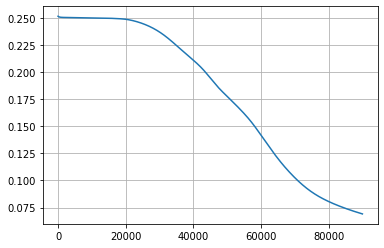

In [15]:
# Mostrara en una tabla la taza de error del modelo, aqui se podra observar la evolución de aprendizaje del modelo.
plt.plot(errors)
plt.grid()

# Parametros de la red

Muestra que valores obtuvo al final la red neuronal ya entrenada

In [16]:
print(params)

{'W1': array([[-1.9619423 ,  2.86733933, -0.40915467,  0.48161218],
       [-1.43050932, -1.1417766 ,  1.77634009,  0.35872071]]), 'b1': array([[ 0.18169902,  0.52655883, -0.24834558, -0.67269571]]), 'W2': array([[ 0.09122738,  0.27073815, -0.48229427,  0.02044861,  0.16326817,
        -0.49543048,  1.92279958, -0.54863959],
       [ 0.26660758, -0.75376126,  0.07777967, -0.5782603 , -0.63495964,
         1.58954438, -0.34158011,  0.54537259],
       [ 0.13632447,  0.51215951, -1.13580666,  0.29238376, -0.95677243,
         1.97082694,  1.09143518, -0.2111367 ],
       [ 0.336976  , -0.4901406 ,  0.04577414,  0.51439359,  0.98856124,
        -0.55695646, -0.18363116, -0.95403547]]), 'b2': array([[-0.67249183, -0.65227226,  0.68905842, -0.14676621, -0.98684662,
        -0.2299307 ,  0.97394547,  0.68705157]]), 'W3': array([[-0.60176273],
       [ 0.31494406],
       [-4.56638072],
       [-0.16043801],
       [-0.08174041],
       [ 3.15797304],
       [ 0.48106376],
       [-2.38451209

# Probar datos nuevos

Este fragmento de código genera datos de prueba aleatorios, y luego utiliza el modelo ya entrenado para hacer una predicción sobre estos datos. Finalmente, utiliza una visualización para mostrar cómo se clasifican estos datos.

In [33]:
# Genera puntos aleatorios en el rango de -1 a 1 en los ejes x e y.
numero_de_puntos = 1200 # Define cuantos puntos se crearan
dataTest = (np.random.rand(numero_de_puntos, 2) * 2) - 1 

# Utiliza la función Training para predecir la salida de la red neuronal para los datos de prueba generados anteriormente.
# El parámetro isTraining se establece en False para indicar que no se deben actualizar los parámetros de la red.
response = Training(x_data_input=dataTest, y_data_input=Y, params=params, redNeurons=dimensionsRedNeurons, isTraining=False)

# Obtiene la salida de la red neuronal y la redondea a 0 o 1 según un umbral de 0.5.
y = response[0]
y = np.where( y >= 0.5, 1, 0)

#### Muestra la grafica con la predicción de la red neuronal.

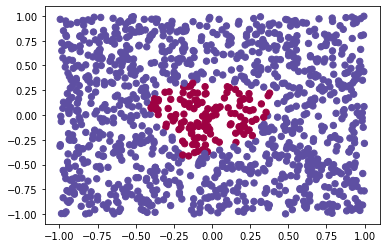

In [34]:
# Grafica los puntos de prueba con un color según la salida de la red neuronal (0 para azul y 1 para rojo).
plt.scatter(dataTest[:, 0], dataTest[:, 1], c=y[:, 0], s=40, cmap=plt.cm.Spectral)

#### Genera un video
En esta sección puedes generar un video con la grafica obtenida. este video se exportara como un mp4 con el nombre "clasificación_de_puntos".

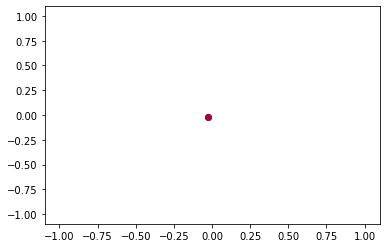

In [44]:
# Creamos una nueva figura y un nuevo eje para representar los datos
fig, ax = plt.subplots()

# Generamos un diagrama de dispersión de los datos de prueba y los colorea de acuerdo a su clase
sc = ax.scatter(dataTest[:, 0], dataTest[:, 1], c=y[:, 0], s=40, cmap=plt.cm.Spectral)

# Definimos una función para actualizar el gráfico en cada iteración de la animación
def update(i):
    # Actualizamos la posición de los puntos del gráfico a medida que se van mostrando más datos de prueba
    sc.set_offsets(dataTest[:i, :])
    # Obtenemos las predicciones del modelo de aprendizaje automático para los datos de prueba mostrados hasta el momento
    y_pred = response[0][:i]
    # Transformamos las predicciones en valores binarios (1 para las predicciones mayores o iguales a 0.5, 0 para las predicciones menores a 0.5)
    y_pred = np.where(y_pred >= 0.5, 1, 0)
    # Actualizamos los colores de los puntos del gráfico de acuerdo a las predicciones binarias
    sc.set_array(y_pred[:, 0])
    # Devolvemos el objeto sc que contiene los puntos y colores del gráfico
    return sc,

# Creamos la animación que llama a la función update en cada iteración
ani = animation.FuncAnimation(fig, update, frames=range(1, numero_de_puntos+1), interval=50)

# Guardamos la animación en un archivo de vídeo utilizando el codificador FFmpeg y una tasa de fotogramas de 30 fps
name_video = "clasificación_de_puntos.mp4"
ani.save(name_video, writer='ffmpeg', fps=30)